## Linear Model Assumptions

Linear models make the following assumptions over the independent variables X, used to predict Y:

- There is a linear relationship between X and the outcome Y
- The independent variables X are normally distributed
- There is no or little co-linearity among the independent variables
- Homoscedasticity (homogeneity of variance)

Examples of linear models are:

- Linear and Logistic Regression
- Linear Discriminant Analysis (LDA)
- Principal Component Regressors

### Definitions:

**Linear relationship** describes a relationship between the independent variables X and the target Y that is given by:
Y ≈ β0 + β1X1 + β2X2 + ... + βnXn.

**Normality** means that every variable X follows a Gaussian distribution.

**Multi-colinearity** refers to the correlation of one independent variable with another. Variables should not be correlated.

**Homoscedasticity**, also known as homogeneity of variance, describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables X and the dependent variable Y is the same across all the independent variables.


**Failure to meet one or more of the model assumptions may end up in a poor model performance**. If the assumptions are not met, we can try a different machine learning model or transform the input variables so that they fulfill the assumptions.


### How can we evaluate if the assumptions are met by the variables?

- Linear regression can be assessed by scatter-plots and residuals plots
- Normal distribution can be assessed by Q-Q plots
- Multi-colinearity can be assessed by correlation matrices
- Homoscedasticity can be assessed by residuals plots


### What can we do if the assumptions are not met?

Sometimes variable transformation can help the variables meet the model assumptions. We normally do 1 of 2 things:

- Mathematical transformation of the variables
- Discretisation


**I will cover mathematical transformations and discretisation in later sections of the course**. 


## In this demo...

We will learn how to do:
- Scatter plots and residual plots to visualise linear relationships
- Q-Q plots for normality
- Correlation matrices to determine co-linearity
- Residual plots for homoscedasticity

We will compare the expected plots (how the plots should look like if the assumptions are met) obtained from simulated data, with the plots obtained from a toy dataset from Scikit-Learn.

In [1]:
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import load_boston

# for linear regression
from sklearn.linear_model import LinearRegression

# to split and standarize the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# to evaluate the regression model
from sklearn.metrics import mean_squared_error

In [2]:
# load the the Boston House price data

# this is how we load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

# add the target
boston['MEDV'] = boston_dataset.target

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# capture the independent variables in a list
features = boston_dataset.feature_names
features

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
# this is the information about the boston house prince dataset
# get familiar with the variables before continuing with 
# the notebook

# the aim is to predict the "Median value of the houses"
# MEDV column of this dataset

# and we have variables with characteristics about
# the homes and the neighborhoods

print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Simulation data for the examples

In [5]:
# I will create a dataframe with the variable x that
# follows a normal distribution and shows a
# linear relationship with y

# this will provide the expected plots
# i.e., how the plots should look like if the
# assumptions are met

np.random.seed(29) # for reproducibility

n = 200
x = np.random.randn(n)
y = x * 10 + np.random.randn(n) * 2

toy_df = pd.DataFrame([x, y]).T
toy_df.columns = ['x', 'y']
toy_df.head()

,x,y
0,-0.417482,-1.271561
1,0.706032,7.990600
2,1.915985,19.848687
3,-2.141755,-21.928903
4,0.719057,5.579070


## Linear Assumption

We evaluate linear assumption with scatter plots and residual plots. Scatter plots plot the change in the dependent variable y with the independent variable x.

### Scatter plots

Text(0.5, 6.79999999999999, 'Independent variable')

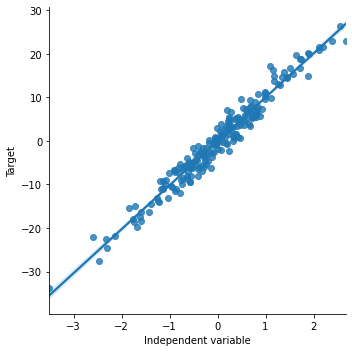

In [6]:
# for the simulated data

# this is how the plot looks like when
# there is a linear relationship

sns.lmplot(x="x", y="y", data=toy_df, order=1)
# order 1 indicates that we want seaborn to
# estimate a linear model (the line in the plot below)
# between x and y

plt.ylabel('Target')
plt.xlabel('Independent variable')

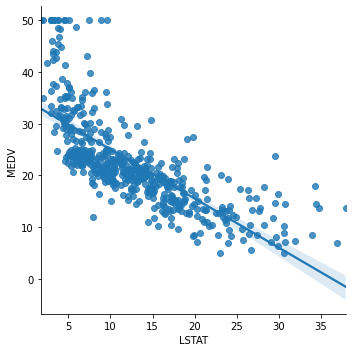

In [7]:
# now we make a scatter plot for the boston
# house price dataset

# we plot LAST (% lower status of the population)
# vs MEDV (median value of the house)

sns.lmplot(x="LSTAT", y="MEDV", data=boston, order=1)

The relationship between LSTAT and MEDV is quite linear apart from a few values around the minimal values of LSTAT, towards the top left side of the plot.

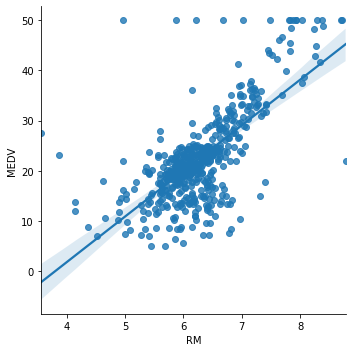

In [8]:
# now we plot RM (average number of rooms per dwelling)
# vs MEDV (median value of the house)

sns.lmplot(x="RM", y="MEDV", data=boston, order=1)

Here it is not so clear whether the relationship is linear. It does seem so around the center of the plot, but there are a lot of dots that do not adjust to the line.

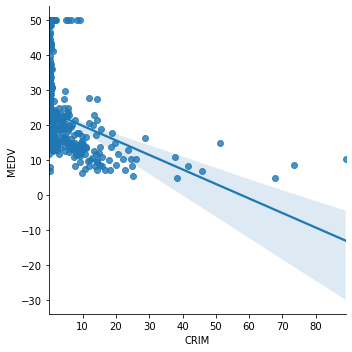

In [9]:
# now we plot CRIM (per capita crime rate by town)
# vs MEDV (median value of the house)

sns.lmplot(x="CRIM", y="MEDV", data=boston, order=1)

The relationship is clearly not linear between CRIM and MEDV. Sometimes, a transformation of CRIM helps improve the linear relationship. See below.

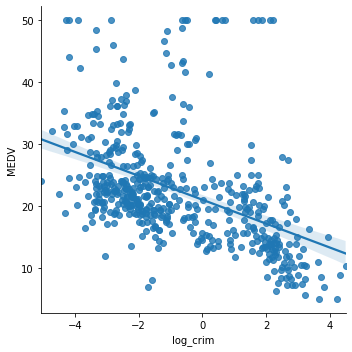

In [10]:
# apply a log transformation of CRIM
boston['log_crim'] = np.log(boston['CRIM'])

# plot the transformed CRIM variable vs MEDV
sns.lmplot(x="log_crim", y="MEDV", data=boston, order=1)

The transformation certainly improved the linear fit between CRIM and MEDV.

In [11]:
# let's drop the added log transformed variable
# we don't need it for the rest of the demo

boston.drop(labels='log_crim', inplace=True, axis=1)

### Assessing linear relationship by examining the residuals (errors)

Another thing that we can do to determine whether there is a linear relationship between the variable and the target is to evaluate the distribution of the errors, or the residuals. The residuals refer to the difference between the predictions and the real value of the target. It is performed as follows:

1) make a linear regression model using the desired variables (X)

2) obtain the predictions 

3) determine the error (True house price - predicted house price)

4) observe the distribution of the error.

If the house price, in this case MEDV, is linearly explained by the variables we are evaluating, then the error should be random noise, and should typically follow a normal distribution centered at 0. We expect to see the error terms for each observation lying around 0.

We will do this first, for the simulated data, to become familiar with how the plots should look like. Then we will do the same for LSTAT and then, we will transform LSTAT to see how transformation affects the residuals and the linear fit.

Text(0, 0.5, 'Real value')

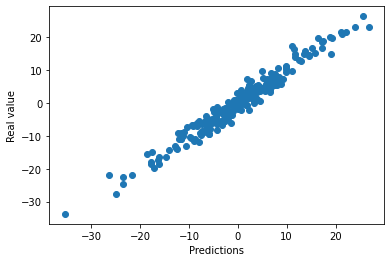

In [12]:
# SIMULATED DATA

# step 1: make a linear model
# call the linear model from sklearn
linreg = LinearRegression()

# fit the model
linreg.fit(toy_df['x'].to_frame(), toy_df['y'])

# step 2: obtain the predictions
# make the predictions
pred = linreg.predict(toy_df['x'].to_frame())

# step 3: calculate the residuals
error = toy_df['y'] - pred

# plot predicted vs real
plt.scatter(x=pred, y=toy_df['y'])
plt.xlabel('Predictions')
plt.ylabel('Real value')

The model makes good predictions. The predictions are quite aligned with the real value of the target.

Text(0.5, 0, 'Independent variable x')

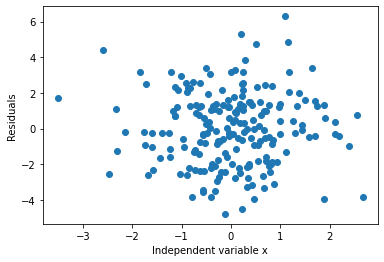

In [13]:
# step 4: observe the distribution of the errors

# Residuals plot
# if the relationship is linear, the noise should be
# random, centered around zero, and follow a normal distribution

# we plot the error terms vs the independent variable x
# error values should be around 0 and homogeneously distributed

plt.scatter(y=error, x=toy_df['x'])
plt.ylabel('Residuals')
plt.xlabel('Independent variable x')

The errors are distributed around 0, as expected.

Text(0.5, 0, 'Residuals')

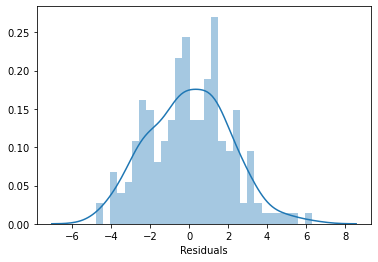

In [14]:
# step 4: observe the distribution of the errors

# plot a histogram of the residuals
# they should follow a gaussian distribution
# centered around 0

sns.distplot(error, bins=30)
plt.xlabel('Residuals')

The errors adopt a Gaussian distribution and it is centered around 0. So it meets the assumptions, as expected.

Let's do the same for LSTAT.

Text(0, 0.5, 'MEDV')

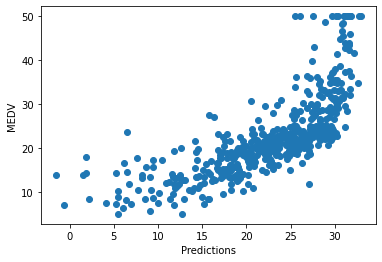

In [15]:
# call the linear model from sklearn
linreg = LinearRegression()

# fit the model
linreg.fit(boston['LSTAT'].to_frame(), boston['MEDV'])

# make the predictions
pred = linreg.predict(boston['LSTAT'].to_frame())

# calculate the residuals
error = boston['MEDV'] - pred

# plot predicted vs real
plt.scatter(x=pred, y=boston['MEDV'])
plt.xlabel('Predictions')
plt.ylabel('MEDV')

There is a relatively good fit for most of the predictions, but the model does not predict very well towards the highest house prices. For high house prices, the model under-estimates the price.

Text(0.5, 0, 'LSTAT')

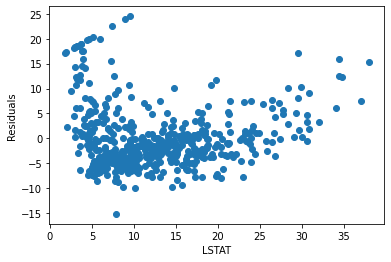

In [16]:
# Residuals plot

# if the relationship is linear, the noise should be
# random, centered around zero, and follow a normal distribution

plt.scatter(y=error, x=boston['LSTAT'])
plt.ylabel('Residuals')
plt.xlabel('LSTAT')

The residuals are not really centered around zero. And the errors are not homogeneously distributed across the values of LSTAT. Low and high values of LSTAT show higher errors. 

The relationship could be improved.

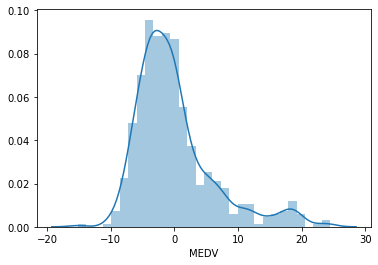

In [17]:
# plot a histogram of the residuals
# they should follow a gaussian distribution
sns.distplot(error, bins=30)

The residuals are not centered around zero, and the distribution is not totally Gaussian. There is a peak at around 20. Can we improve the fit by transforming LSTAT?

Text(0, 0.5, 'MEDV')

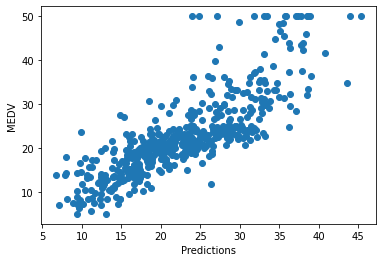

In [18]:
# let's repeat the exercise but fitting the model to the
# log transformed LSTAT

# call the linear model from sklearn
linreg = LinearRegression()

# fit the model
linreg.fit(np.log(boston['LSTAT']).to_frame(), boston['MEDV'])

# make the predictions
pred = linreg.predict(np.log(boston['LSTAT']).to_frame())

# calculate the residuals
error = boston['MEDV'] - pred

# plot predicted vs real
plt.scatter(x=pred, y=boston['MEDV'])
plt.xlabel('Predictions')
plt.ylabel('MEDV')

The predictions seem a bit better than with the non-transformed variable.

Text(0.5, 0, 'LSTAT')

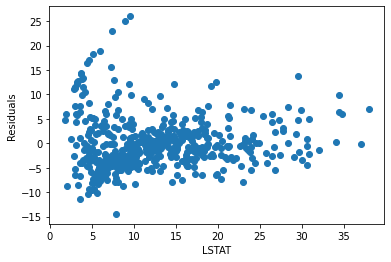

In [19]:
# Residuals plot
# if the relationship is linear, the noise should be
# random, centered around zero, and follow a normal distribution

plt.scatter(y=error, x=boston['LSTAT'])
plt.ylabel('Residuals')
plt.xlabel('LSTAT')

The residuals are more centered around zero and more homogeneously distributed across the values of x.

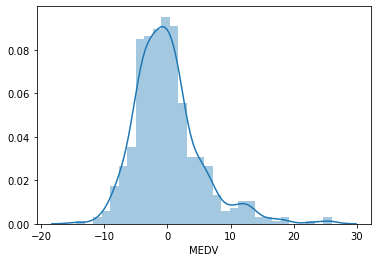

In [20]:
# plot a histogram of the residuals
# they should follow a gaussian distribution
sns.distplot(error, bins=30)

The histogram looks more Gaussian, and the peak towards 20 has now disappeared. We can see how a variable transformation improved the fit and helped meet the linear model assumption of linearity. 

Go ahead and try this in the variables RM and CRIM.

## Multicolinearity

To determine co-linearity, we evaluate the correlation of all the independent variables in the dataframe.

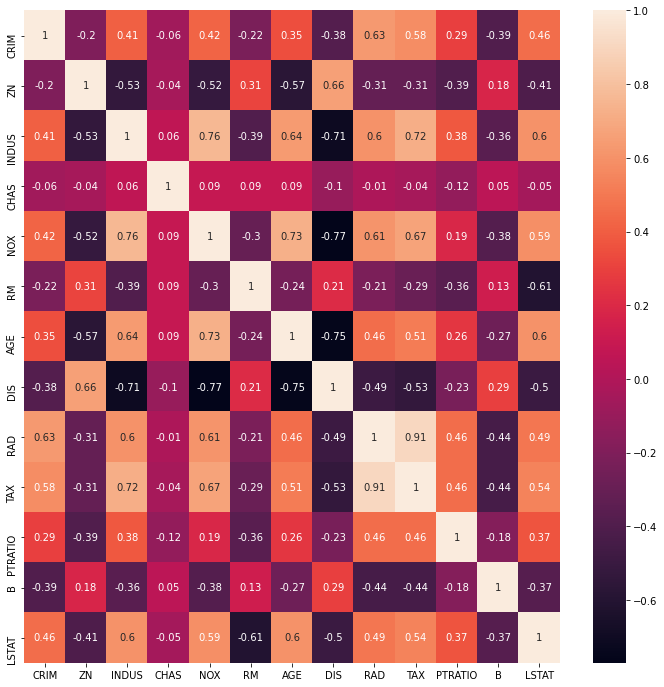

In [21]:
# we calculate the correlations using pandas corr
# and we round the values to 2 decimals
correlation_matrix = boston[features].corr().round(2)

# plot the correlation matrix usng seaborn
# annot = True to print the correlation values
# inside the squares

figure = plt.figure(figsize=(12, 12))
sns.heatmap(data=correlation_matrix, annot=True)

On the x and y axis of the heatmap we have the variables of the boston house dataframe. Within each square, the correlation value between those 2 variables is indicated. For example, for LSTAT vs CRIM at the bottom left of the heatmap, we see a correlation of 0.46. These 2 variables are not highly correlated.

Instead, for the variables RAD and TAX (try and find them in the plot), the correlation is 0.91. These variables are highly correlated. The same is true for the variables NOX and DIS, which show a correlation value of -0.71.

Let's see how they look in a scatter plot.

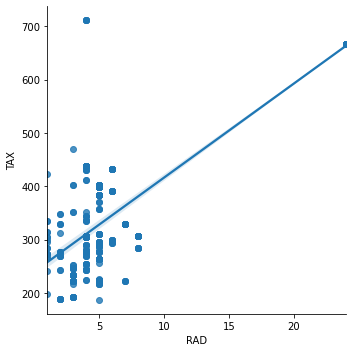

In [22]:
# correlation between RAD (index of accessibility to radial highways)
# and TAX (full-value property-tax rate per $10,000)

sns.lmplot(x="RAD", y="TAX", data=boston, order=1)

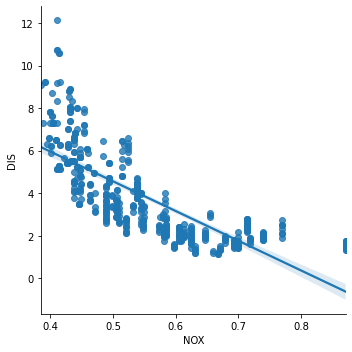

In [23]:
# and now NOX (itric oxides concentration (parts per 10 million))
# and DIS (weighted distances to five Boston employment centres)

sns.lmplot(x="NOX", y="DIS", data=boston, order=1)

The correlation, or co-linearity between NOX and DIS, is quite obvious in the above scatter plot. So these variables are violating the assumption of no multi co-linearity.

What we would do is remove 1 of the 2 from the dataset before training the linear model.

## Normality

We evaluate normality using histograms and Q-Q plots. I explain Q-Q plots a few cells below. 

Let's begin with histograms. If the variable is normally distributed, we should observe the typical Gaussian bell shape.

### Histograms

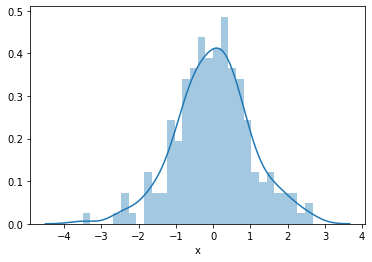

In [24]:
# histogram of the simulated independent variable x
# which we know follows a Gaussian distribution

sns.distplot(toy_df['x'], bins=30)

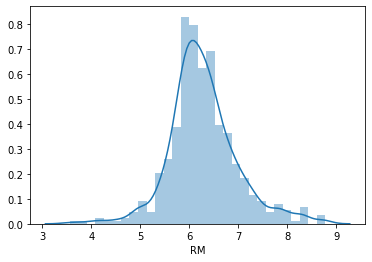

In [25]:
# histogram of the variable RM 
# (average number of rooms per dwelling)

sns.distplot(boston['RM'], bins=30)

This variable seems to follow a Normal distribution. it meets the assumption.

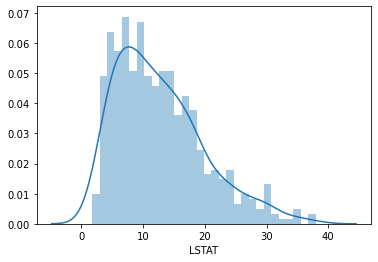

In [26]:
# histogram of the variable LSTAT
# (% lower status of the population)

sns.distplot(boston['LSTAT'], bins=30)

LSTAT is skewed. Let's see if a transformation fixes this.

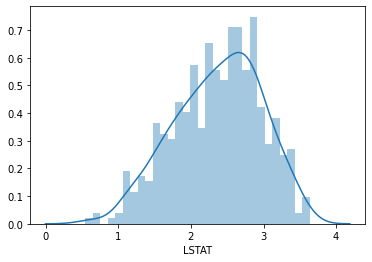

In [27]:
# histogram of the log-transformed LSTAT for comparison
sns.distplot(np.log(boston['LSTAT']), bins=30)

The distribution is less skewed, but not totally normal either. We could go ahead and try other transformations. I will say more on this in a dedicated section later in the course.

### Q-Q plots

In a Q-Q plot, the quantiles of the variable are plotted on the vertical axis (y), and the quantiles of a specified probability distribution (Gaussian distribution) are indicated on the horizontal axis (x). The plot consists of a series of points that show the relationship between the quantiles of the real data and the quantiles of the specified probability distribution. If the values of a variable perfectly match the specified probability distribution (i.e., the normal distribution), the points on the graph will form a 45 degree line. See below.

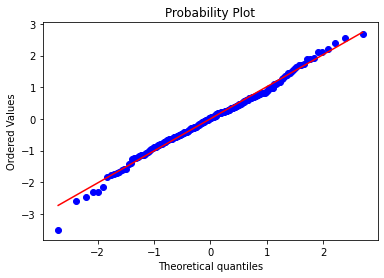

In [28]:
# let's plot the Q-Q plot for the simualted data.
# the dots should adjust to the 45 degree line

stats.probplot(toy_df['x'], dist="norm", plot=plt)
plt.show()

And they do. This is how a normal distribution looks like in a Q-Q plot.

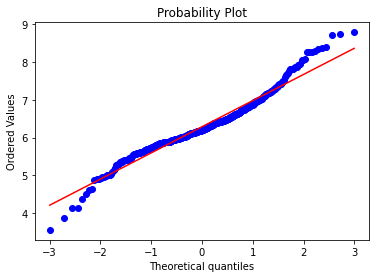

In [29]:
# let's do the same for RM
stats.probplot(boston['RM'], dist="norm", plot=plt)
plt.show()

Most of the points adjust to the 45 degree line. However, the values at both ends of the distribution deviate from the line. This indicates that the distribution of RM is not perfectly Gaussian.

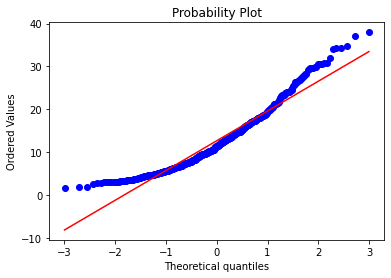

In [30]:
# and now for LSTAT
stats.probplot(boston['LSTAT'], dist="norm", plot=plt)
plt.show()

Many of the observations lie on the 45 degree red line following the expected quantiles of the theoretical Gaussian distribution, particularly towards the center of the plot. Some observations at the lower and upper end of the value range depart from the red line, which indicates that the variable LSTAT is not normally distributed, as we rightly so in the histogram.

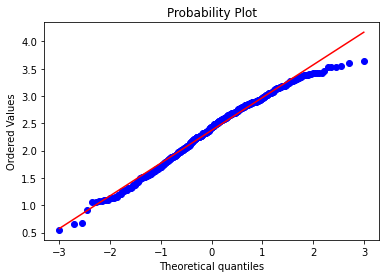

In [31]:
# let's see if a transformation improves the normality
# and now for the log transformed LSTAT
stats.probplot(np.log(boston['LSTAT']), dist="norm", plot=plt)
plt.show()

We can see that after the transformation, the quantiles are more aligned over the 45 degree line with the theoretical quantiles of the Gaussian distribution.

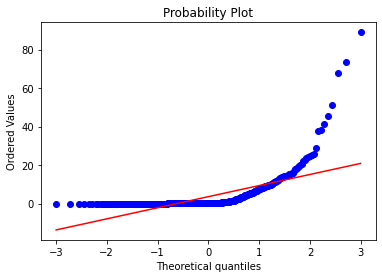

In [32]:
# just for comparison, let's go ahead and plot CRIM
stats.probplot(boston['CRIM'], dist="norm", plot=plt)
plt.show()

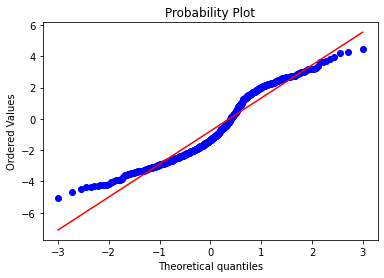

In [33]:
# and let's see if a transformation improves the fir
stats.probplot(np.log(boston['CRIM']), dist="norm", plot=plt)
plt.show()

In this case, the transformation improved the fit, but the transformed distribution is not Gaussian. We could try with a different transformation. But I leave this for a later section of the course.

## Homocedasticity

Homoscedasticity, also known as homogeneity of variance, describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables X and the dependent variable Y is the same across all the independent variables.

The way to identify if the variables are homoscedastic, is to make a linear model with all the independent variables involved, calculate the residuals, and plot the residuals vs each one of the independent variables. If the distribution of the residuals is homogeneous across the variable values, then the variables are homoscedastic.

There are other tests for homoscedasticity:

- Residuals plot
- Levene’s test
- Barlett’s test
- Goldfeld-Quandt Test

But those escape the scope of this course. So for this demo I will focus on residual plot analysis.

In [34]:
# to train and evaluate the model, let's first split into
# train and test data, using the variables of choice:
# LSTAT, RM and CRIM

# let's separate into training and testing set
# using the sklearn function below

X_train, X_test, y_train, y_test = train_test_split(
    boston[['RM', 'LSTAT', 'CRIM']],
    boston['MEDV'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 3), (152, 3), (354,), (152,))

In [35]:
# let's scale the features
# normal procedure for linear models
# I will explain this later on in the course

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [36]:
# model build using the natural distributions

# call the model
linreg = LinearRegression()

# train the model
linreg.fit(scaler.transform(X_train), y_train)

# make predictions on the train set and calculate
# the mean squared error
print('Train set')
pred = linreg.predict(scaler.transform(X_train))
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))

# make predictions on the test set and calculate
# the mean squared error
print('Test set')
pred = linreg.predict(scaler.transform(X_test))
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
print()

Train set
Linear Regression mse: 28.603232128198893
Test set
Linear Regression mse: 33.20006295308442



Text(0, 0.5, 'Residuals')

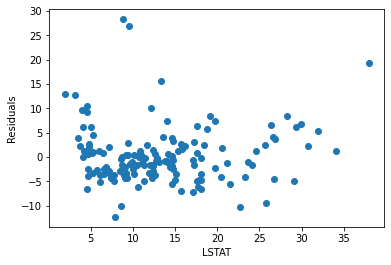

In [37]:
# calculate the residuals
error = y_test - pred

# plot the residuals vs one of the independent
# variables, LSTAT in this case

plt.scatter(x=X_test['LSTAT'], y=error)
plt.xlabel('LSTAT')
plt.ylabel('Residuals')

The residuals seem fairly homogeneously distributed across the values of LSTAT.

Text(0, 0.5, 'Residuals')

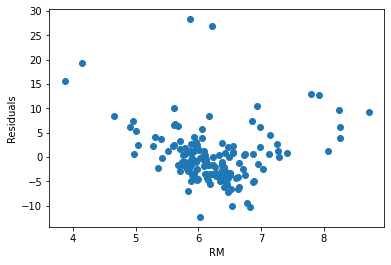

In [38]:
# let's plot the residuals vs RM
plt.scatter(x=X_test['RM'], y=error)
plt.xlabel('RM')
plt.ylabel('Residuals')

For this variable, the residuals do not seem to be homogeneously distributed across the values of RM. In fact, low and high values of RM show higher error terms.

Text(0, 0.5, 'Residuals')

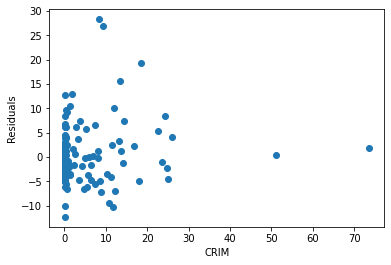

In [39]:
# plot the residuals vs one of the independent
# variables, CRIM in this case

plt.scatter(x=X_test['CRIM'], y=error)
plt.xlabel('CRIM')
plt.ylabel('Residuals')

The residuals for this particular variable are very skewed.

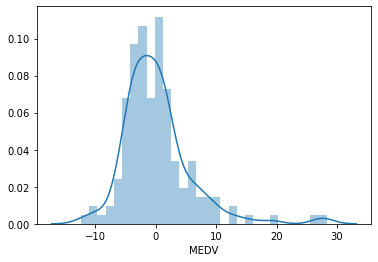

In [40]:
sns.distplot(error, bins=30)

The distribution of the residuals is fairly normal, but not quite, with more high values than expected towards the right end of the distribution.

C:\Users\Sole\Documents\Repositories\envs\fe_test\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


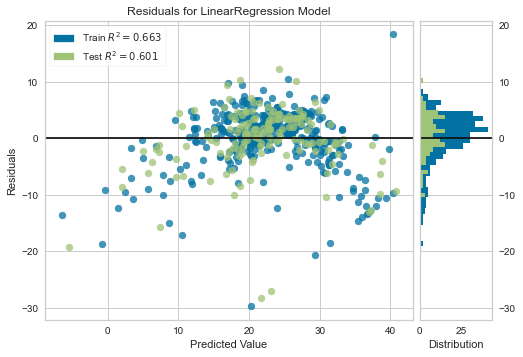

In [41]:
# in this cell, I want to introduce the use of yellobricks
# a library for visualisation of machine learning model 
# outcomes

# if you don't have yellowbricks installed, comment out
# this cell to avoid errors while running the notebook

# yellowbricks allows you to visualise the residuals of the
# models after fitting a linear regression

from yellowbrick.regressor import ResidualsPlot

linreg = LinearRegression()
linreg.fit(scaler.transform(X_train), y_train)
visualizer = ResidualsPlot(linreg)

visualizer.fit(scaler.transform(X_train), y_train)  # Fit the training data to the model
visualizer.score(scaler.transform(X_test), y_test)  # Evaluate the model on the test data
visualizer.poof()

We see from the plot that the residuals are not homogeneously distributed across the predicted value and are not centered around zero either.

Let's see if transformation of the variables CRIM and LSTAT helps improve the fit and the homoscedasticity.

In [42]:
# log transform the variables
boston['LSTAT'] = np.log(boston['LSTAT'])
boston['CRIM'] = np.log(boston['CRIM'])
boston['RM'] = np.log(boston['RM'])

# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    boston[['RM', 'LSTAT', 'CRIM']],
    boston['MEDV'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 3), (152, 3), (354,), (152,))

In [43]:
# let's scale the features
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [44]:
# model build using the natural distributions

# call the model
linreg = LinearRegression()

# fit the model
linreg.fit(scaler.transform(X_train), y_train)

# make predictions and calculate the mean squared
# error over the train set
print('Train set')
pred = linreg.predict(scaler.transform(X_train))
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))

# make predictions and calculate the mean squared
# error over the test set
print('Test set')
pred = linreg.predict(scaler.transform(X_test))
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
print()

Train set
Linear Regression mse: 24.36853232810096
Test set
Linear Regression mse: 29.516553315892253



If you compare these squared errors with the ones obtained using the non-transformed data, you can see that transformation improved the fit, as the mean squared errors for both train and test sets are smaller when using transformed data.

Text(0, 0.5, 'Residuals')

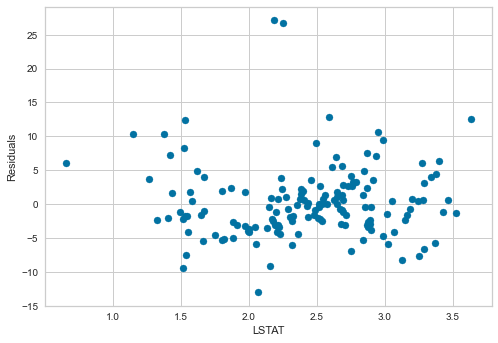

In [45]:
# calculate the residuals
error = y_test - pred

# residuals plot vs the variable
plt.scatter(x=X_test['LSTAT'], y=error)
plt.xlabel('LSTAT')
plt.ylabel('Residuals')

Values seem homogeneously distributed across values of LSTAT and centered around zero.

Text(0, 0.5, 'Residuals')

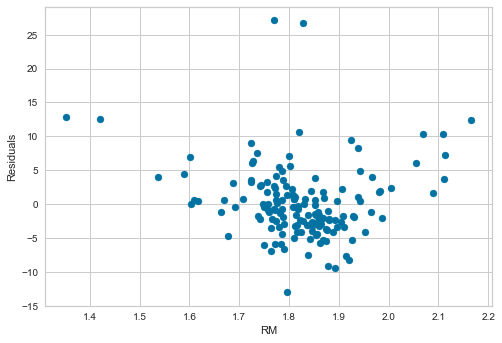

In [46]:
plt.scatter(x=X_test['RM'], y=error)
plt.xlabel('RM')
plt.ylabel('Residuals')

The transformation improved the spread of the residuals across the values of RM.

Text(0, 0.5, 'Residuals')

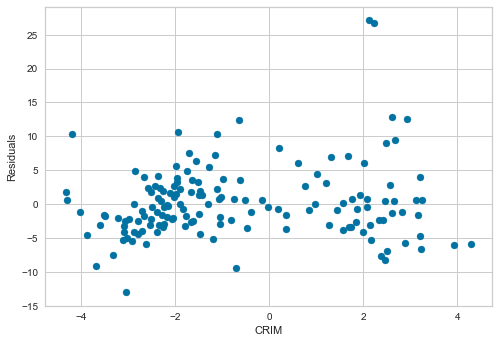

In [47]:
plt.scatter(x=X_test['CRIM'], y=error)
plt.xlabel('CRIM')
plt.ylabel('Residuals')

The transformation helped distribute the residuals across the values of CRIM.

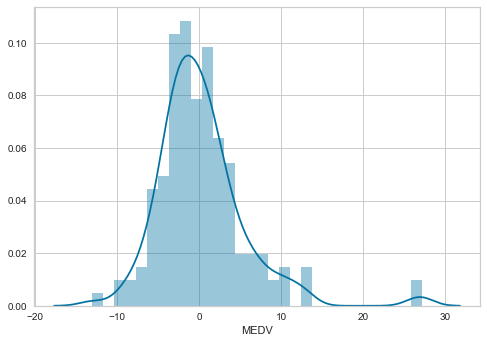

In [48]:
sns.distplot(error, bins=30)

The distribution of the residuals is more Gaussian looking now. There is still a few higher than expected residuals towards the right of the distribution, but leaving those apart, the distribution seems less skewed than with the non-transformed data.

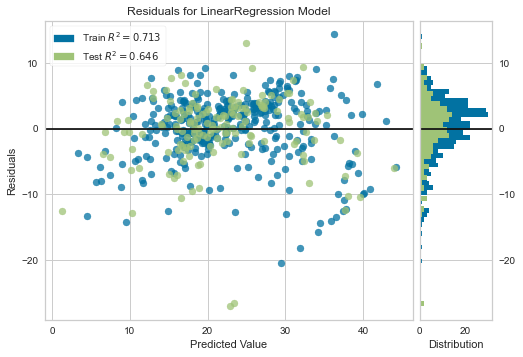

In [49]:
# and now let's plot the residuals using yellobricks

# remember to comment this cell out if you don't have yellobricks installed
linreg = LinearRegression()
linreg.fit(scaler.transform(X_train), y_train)
visualizer = ResidualsPlot(linreg)

visualizer.fit(scaler.transform(X_train), y_train)  # Fit the training data to the model
visualizer.score(scaler.transform(X_test), y_test)  # Evaluate the model on the test data
visualizer.poof()

The errors are more homogeneously distributed and centered around 0.

Look at the R2 values in the yellowbricks residual plots. Compare the values for the models utilising the transformed and non-transformed data. We can see how transforming the data, improved the fit (R2 in test of 0.65 for transformed data vs 0.6 for non-transformed data)